In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Dataset-SA.csv')

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
X = df[["Review", "Summary"]]
y = df["Sentiment"]

In [ ]:
df.groupby(by = ["Sentiment", "Rate"]).count()
# There are a few missing values and some values that do not make sense

product_name  \
Sentiment Rate                                                               
negative  1                                                          18793   
          2                                                           4707   
          3                                                           3023   
          4                                                            882   
          5                                                            826   
          Bajaj DX 2 L/W Dry Iron                                        1   
neutral   1                                                           1233   
          2                                                           1050   
          3                                                           3660   
          4                                                           1982   
          5                                                           2314   
positive  1                                                           1274   
          2                                                            734   
          3                                                           9916   
          4                                                          39030   
          5                                                         115625   
          Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿...             1   
          Pigeon Favourite Electric Kettle??????(1.5 L, S...             1   

                                                              product_price  \
Sentiment Rate                                                                
negative  1                                                           18793   
          2                                                            4707   
          3                                                            3023   
          4                                                             882   
          5                                                             826   
          Bajaj DX 2 L/W Dry Iron                                         1   
neutral   1                                                            1233   
          2                                                            1050   
          3                                                            3660   
          4                                                            1982   
          5                                                            2314   
positive  1                                                            1274   
          2                                                             734   
          3                                                            9916   
          4                                                           39030   
          5                                                          115625   
          Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿...              1   
          Pigeon Favourite Electric Kettle??????(1.5 L, S...              1   

                                                              Review  Summary  
Sentiment Rate                                                                 
negative  1                                                    16156    18793  
          2                                                     3977     4707  
          3                                                     2646     3023  
          4                                                      836      882  
          5                                                      785      826  
          Bajaj DX 2 L/W Dry Iron                                  1        1  
neutral   1                                                     1029     1233  
          2                                                      853     1049  
          3                                                     3123     3660  
          4                             

In [ ]:
# Cleaning bad values
df = df[df["Rate"].isin(["1", "2", "3", "4", "5"])]

In [ ]:
df.groupby(by = ["Sentiment", "Rate"]).count()
# There are a few missing values still

product_name  product_price  Review  Summary
Sentiment Rate                                              
negative  1            18793          18793   16156    18793
          2             4707           4707    3977     4707
          3             3023           3023    2646     3023
          4              882            882     836      882
          5              826            826     785      826
neutral   1             1233           1233    1029     1233
          2             1050           1050     853     1049
          3             3660           3660    3123     3660
          4             1982           1982    1767     1981
          5             2314           2314    2039     2311
positive  1             1274           1274    1109     1274
          2              734            734     621      734
          3             9916           9916    8255     9916
          4            39030          39030   34366    39028
          5           115625         115625  102823   115621

In [ ]:
# Counting missing values
print(f"Missing Reviews: {sum(df.Review.isna())},\nMissing Summary: {sum(df.Summary.isna())},\nTotal values: {len(df)}")

# Since there are 11 values out of 205049 total values, I'll remove those 11 records

Missing Reviews: 24664,
Missing Summary: 11,
Total values: 205049


In [ ]:
df = df[~df.Summary.isna()]

In [ ]:
print(f"Missing Reviews: {sum(df.Review.isna())},\nMissing Summary: {sum(df.Summary.isna())},\nTotal values: {len(df)}")


Missing Reviews: 24662,
Missing Summary: 0,
Total values: 205038


In [ ]:
X = df["Summary"]
y = df["Sentiment"]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf.shape

(164030, 18388)

In [ ]:
# Get the feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the feature names
print("Feature names (terms):")
print(feature_names)

Feature names (terms):
['01' '05' '10' ... 'zips' 'zone' 'zoom']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train a text classification model (for example, a Naive Bayes classifier)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8581740148263753


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.8581740148263753
              precision    recall  f1-score   support

    negative       0.72      0.64      0.68      5682
     neutral       0.33      0.50      0.40      2157
    positive       0.93      0.92      0.93     33169

    accuracy                           0.86     41008
   macro avg       0.66      0.69      0.67     41008
weighted avg       0.87      0.86      0.86     41008



In [ ]:
y.value_counts()

positive    166573
negative     28231
neutral      10234
Name: Sentiment, dtype: int64

In [ ]:
# Create a pipeline with resampling and a classifier
pipeline = Pipeline([
    ('sampling', SMOTE()),  # You can replace SMOTE with other resampling techniques
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.72      0.75      0.73      5682
     neutral       0.42      0.63      0.51      2157
    positive       0.96      0.92      0.94     33169

    accuracy                           0.88     41008
   macro avg       0.70      0.77      0.72     41008
weighted avg       0.90      0.88      0.89     41008



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline

pipeline = Pipeline([
    ('sampling', SMOTE()),  # You can replace SMOTE with other resampling techniques
    ('classifier', MultinomialNB())
])

pipeline.fit(X_train_tfidf, y_train)
y_pred = pipeline.predict(X_test_tfidf)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.66      0.81      0.73      5682
     neutral       0.38      0.62      0.47      2157
    positive       0.97      0.89      0.93     33169

    accuracy                           0.87     41008
   macro avg       0.67      0.77      0.71     41008
weighted avg       0.90      0.87      0.88     41008



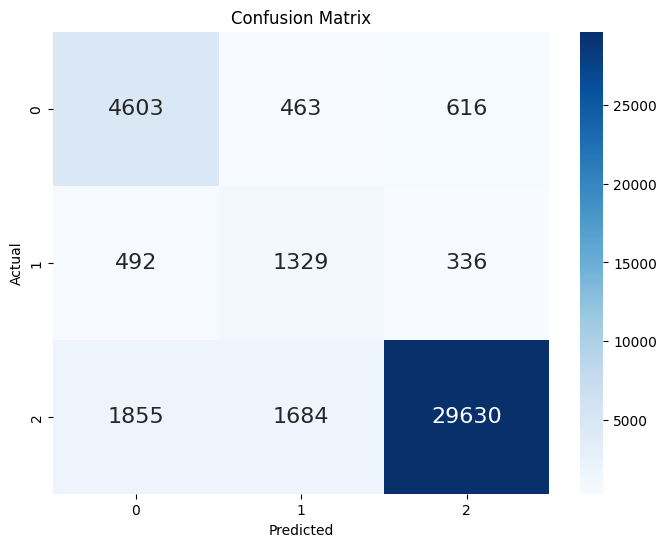

Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.81      0.73      5682
     neutral       0.38      0.62      0.47      2157
    positive       0.97      0.89      0.93     33169

    accuracy                           0.87     41008
   macro avg       0.67      0.77      0.71     41008
weighted avg       0.90      0.87      0.88     41008



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle


# Train a classifier (Random Forest in this case)
clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
y_score = clf.fit(X_train_tfidf, y_train).predict_proba(X_test_tfidf)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(hidden_layer_sizes=(100 for _ in range(3)))

In [ ]:
# Train a text classification model (for example, a Naive Bayes classifier)
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

array([2, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2,
       2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0,
       2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0,
       2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2,
       0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2,
       2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def plot_learning_curve(X_train, X_test, y_train, y_test, clf):

  if len(set(y_train)) > 2:
    # Create a learning curve using scikit-learn's learning_curve function
    train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=5,
                                                          scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10))

    # Convert negative log loss to positive for plotting
    train_scores = -train_scores
    val_scores = -val_scores

  else:
    # Create a learning curve using scikit-learn's learning_curve function
    train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  val_scores_mean = np.mean(val_scores, axis=1)
  val_scores_std = np.std(val_scores, axis=1)

  # Plot the learning curve
  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o')
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')

  plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='red', marker='o')
  plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

  plt.title(clf.__class__.__name__)
  plt.xlabel('Number of Training Samples')
  plt.ylabel('Accuracy' if len(set(y_train)) == 2 else 'Negative Log Loss')
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()


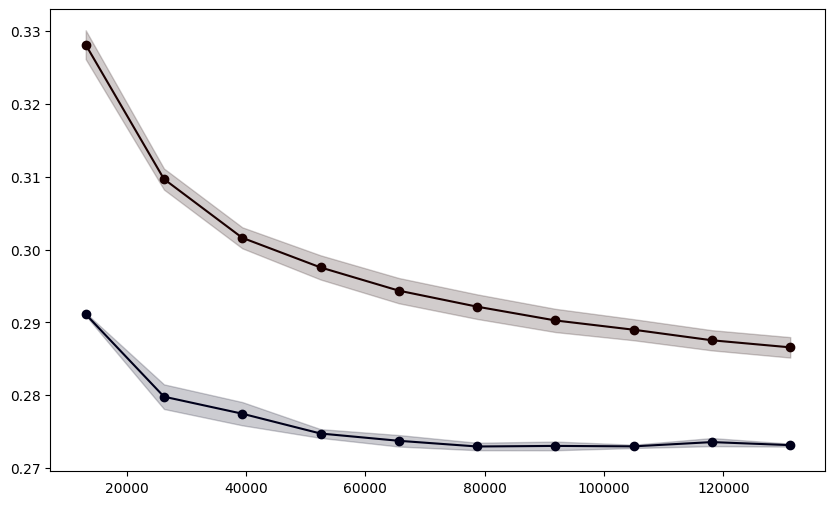

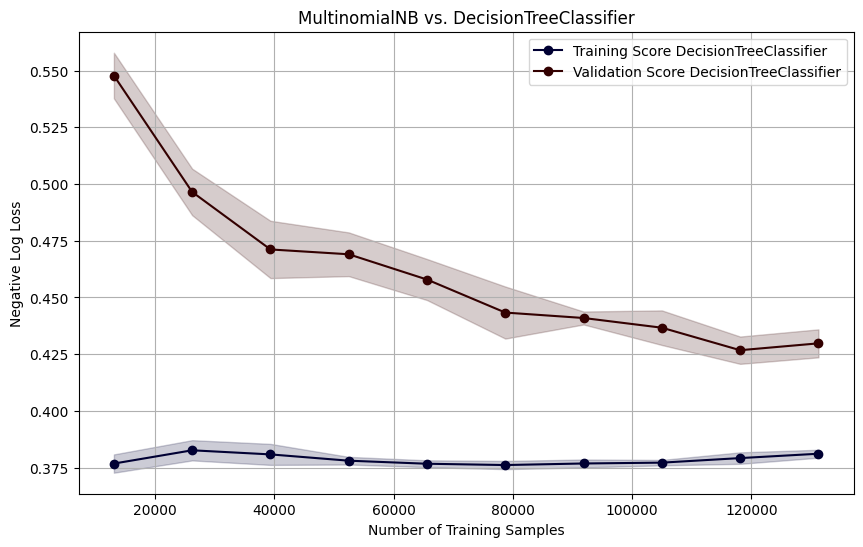

In [ ]:
plot_learning_curves(X_train_tfidf, X_test_tfidf, y_train, y_test, clfs = [MultinomialNB(), DecisionTreeClassifier(max_depth = 10)])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def plot_learning_curves(X_train, X_test, y_train, y_test, clfs):
  i = 1
  plt.figure(figsize=(10, 6))
  for clf in clfs:
    if len(set(y_train)) > 2:
      # Create a learning curve using scikit-learn's learning_curve function
      train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=5,
                                                            scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10))

      # Convert negative log loss to positive for plotting
      train_scores = -train_scores
      val_scores = -val_scores

    else:
      # Create a learning curve using scikit-learn's learning_curve function
      train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot the learning curve

    # Getting color intensity for plot and fill
    color_intensity = i / len(train_sizes) * 255
    i += 1
    plt.plot(train_sizes, train_scores_mean, label=f'Training Score {clf.__class__.__name__}', color=(0, 0, color_intensity), marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color=(0, 0, color_intensity))

    plt.plot(train_sizes, val_scores_mean, label=f'Validation Score {clf.__class__.__name__}', color=(color_intensity, 0, 0), marker='o')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color=(color_intensity, 0, 0))

  clf_name = set([clf.__class__.__name__ for clf in clfs])
  title = " vs. ".join([name for name in clf_name])
  plt.title(title)
  plt.xlabel('Number of Training Samples')
  plt.ylabel('Accuracy' if len(set(y_train)) == 2 else 'Negative Log Loss')
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()


In [ ]:
plot_learning_curves(X_train_tfidf, X_test_tfidf, y_train, y_test, clfs = [MultinomialNB(), DecisionTreeClassifier(max_depth = 10)])

TypeError: object of type 'DecisionTreeClassifier' has no len()

# Breast Cancer: Here on

## Helper function to plot learning curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time

def plot_learning_curves(X_train, X_test, y_train, y_test, clfs, plot_train = True, cv=5, names = None):
  print(names)
  i = 0
  j = 0
  # Specify the number of colors in the colormap
  num_colors = len(clfs * 2)

  # Create a colormap with the specified number of colors
  cmap = plt.get_cmap('viridis', num_colors)

  # Get RGB values for each color in the colormap
  rgb_values = [cmap(i)[:3] for i in np.linspace(0, 1, num_colors)]

  plt.figure(figsize=(15, 9))
  for clf in clfs:
    # Record the start time
    start_time = time.time()
    if len(set(y_train)) > 2:
      # Create a learning curve using scikit-learn's learning_curve function
      train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=cv,
                                                            scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10))

      # Convert negative log loss to positive for plotting
      train_scores = -train_scores
      val_scores = -val_scores

    else:
      # Create a learning curve using scikit-learn's learning_curve function
      train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate mean and standard error of mean of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_sem = np.std(train_scores, axis=1) / np.sqrt(len(train_scores))
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_sem = np.std(val_scores, axis=1) / np.sqrt(len(val_scores))

    if names == None:
      clf_name = set([clf.__class__.__name__ for clf in clfs])
      title = " vs. ".join([name for name in clf_name])
      label_train = f'Training Score {clf.__class__.__name__}'
      label_val=f'Validation Score {clf.__class__.__name__}'
    else:
      title = " vs. ".join([name for name in names])
      label_train = f'Training Score: {names[j]}'
      label_val = f'Validation Score: {names[j]}'
      j += 1

    # Plot the learning curve
    if plot_train:
      plt.plot(train_sizes, train_scores_mean, label = label_train, color=rgb_values[i], marker='o')
      plt.fill_between(train_sizes, train_scores_mean - train_scores_sem, train_scores_mean + train_scores_sem, alpha=0.2, color=rgb_values[i])

    plt.plot(train_sizes, val_scores_mean, label = label_val, color=rgb_values[i + 1], marker='o')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_sem, val_scores_mean + val_scores_sem, alpha=0.2, color=rgb_values[i + 1])
    i += 2
    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f"{clf.__class__.__name__} time: {elapsed_time:.4f} seconds")


  plt.title(title)
  plt.xlabel('Number of Training Samples')
  plt.ylabel('Accuracy' if len(set(y_train)) == 2 else 'Negative Log Loss')
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()


In [2]:
# Get non-default hyperparameters
non_default_params = {param: value for param, value in best_params.items() if tree.get_params()[param] != value}

NameError: name 'best_params' is not defined

In [5]:
df = pd.read_csv("/content/breast-cancer.csv")

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
display(df.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

scalar = StandardScaler()
scalar.fit(X_train)


StandardScaler()

In [11]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

KNeighborsClassifier time: 6.3769 seconds
DecisionTreeClassifier time: 1.0582 seconds
MLPClassifier time: 48.0212 seconds
GradientBoostingClassifier time: 27.5866 seconds
SVC time: 0.6123 seconds


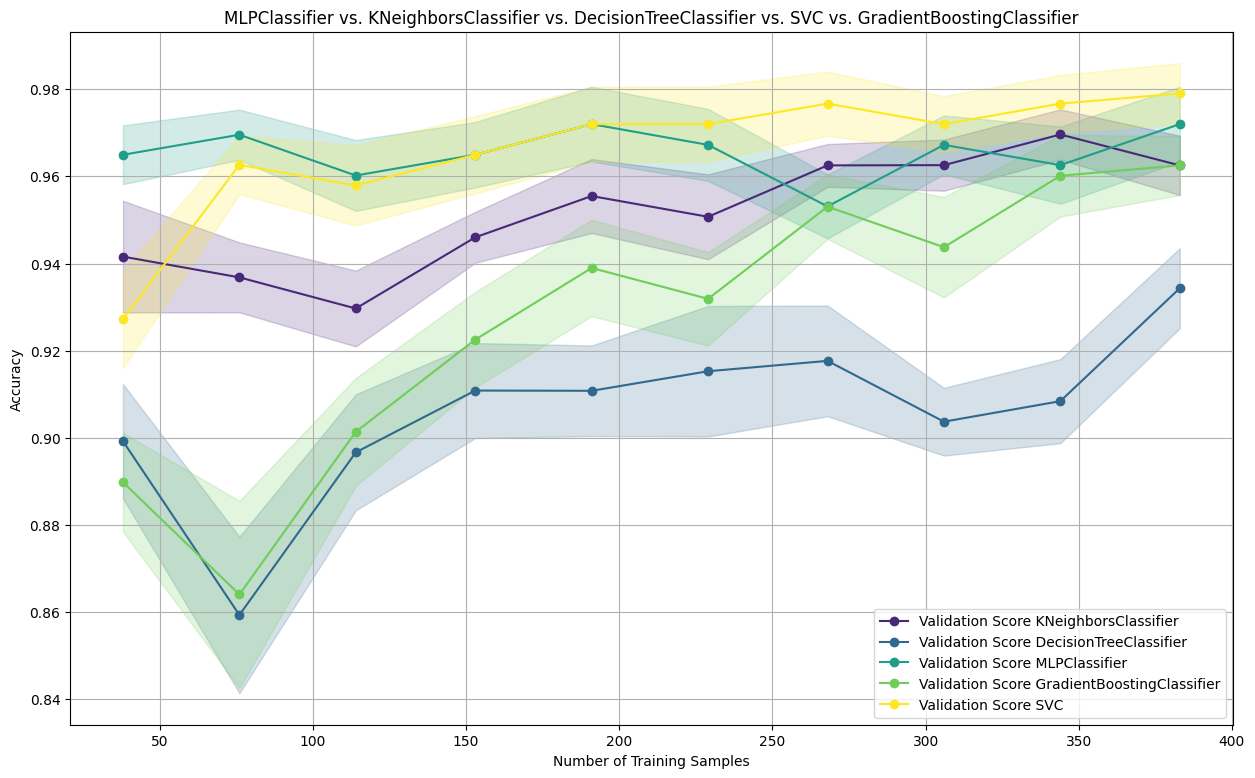

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs = [KNeighborsClassifier(n_neighbors = 5),
                             DecisionTreeClassifier(max_depth = 10),
                             MLPClassifier(hidden_layer_sizes = (100, 100, 50, 20)),
                             GradientBoostingClassifier(n_estimators=100, random_state=42),
                             SVC()],
                     plot_train = False,
                     cv = 10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Example variable
my_model = RandomForestClassifier(n_estimators=100)
# Alternatively, my_model = Pipeline([('classifier', RandomForestClassifier(n_estimators=100))])

# Check if it's a classifier
if isinstance(pipeline, type(Pipeline([]))):
    print("It's a pipeline.")
pipeline.steps[-1][1].__class__.__name__
type(pipeline)

It's a pipeline.


## Decision trees

- Validation curves for at least two hyperparameters
 - Pruning is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - bias and variance / overfit and underfit analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - bias and variance / overfit and underfit analysis
 - Add intermidate learning or validation curve to show suboptimal performance and analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times


In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter tuning

- Pruning
 - Post pruning using cost complexity pruning
 - Prepruning by varying the max_depth parameter which varies the maximum depth of the tree


#### Post pruning using cost complexity pruning

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Create an Decision Tree classifier with a radial basis function (RBF) kernel
dct_clf = DecisionTreeClassifier(random_state = 0)

# Find the ccp_alpha values
path = dct_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs_post = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state = 0)
  clf.fit(X_train, y_train)
  clfs_post.append(clf)
  print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs_post[-1].tree_.node_count, ccp_alpha
    )
    )

Number of nodes in the last tree is: 31 with ccp_alpha: 0.0
Number of nodes in the last tree is: 27 with ccp_alpha: 0.0022664723976040134
Number of nodes in the last tree is: 21 with ccp_alpha: 0.004647426339100881
Number of nodes in the last tree is: 19 with ccp_alpha: 0.004659799593581376
Number of nodes in the last tree is: 17 with ccp_alpha: 0.005633802816901408
Number of nodes in the last tree is: 15 with ccp_alpha: 0.007042253521126761
Number of nodes in the last tree is: 13 with ccp_alpha: 0.007841938420144537
Number of nodes in the last tree is: 11 with ccp_alpha: 0.009114019793328328
Number of nodes in the last tree is: 9 with ccp_alpha: 0.011443661971830986
Number of nodes in the last tree is: 7 with ccp_alpha: 0.018988002086593604
Number of nodes in the last tree is: 5 with ccp_alpha: 0.023141627543035996
Number of nodes in the last tree is: 3 with ccp_alpha: 0.03422474765119576
Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


#### Prepruning by varying the max_depth parameter which varies the maximum depth of the tree

In [ ]:
clfs_pre = []

for i in range(1, 9):
  clf = DecisionTreeClassifier(max_depth = i, random_state = 0)
  clf.fit(X_train, y_train)
  clfs_pre.append(clf)
  print(
    "Number of nodes in the last tree is: {} with depth: {}".format(
        clfs_pre[-1].tree_.node_count, i
    )
    )

Number of nodes in the last tree is: 3 with depth: 1
Number of nodes in the last tree is: 7 with depth: 2
Number of nodes in the last tree is: 15 with depth: 3
Number of nodes in the last tree is: 23 with depth: 4
Number of nodes in the last tree is: 25 with depth: 5
Number of nodes in the last tree is: 27 with depth: 6
Number of nodes in the last tree is: 29 with depth: 7
Number of nodes in the last tree is: 31 with depth: 8


### Plotting training and testing accuracies for bias and variance / overfit and underfit analysis

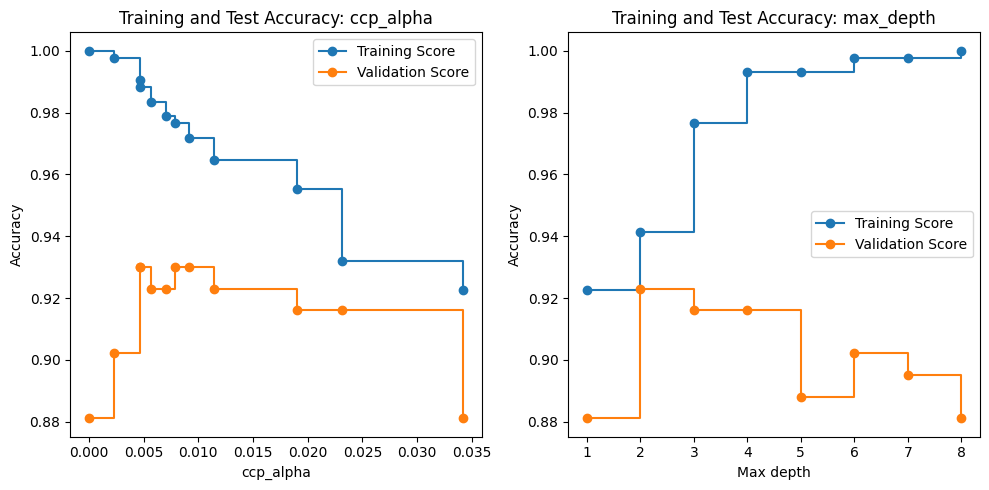

In [ ]:
from sklearn.model_selection import cross_val_score

train_scores_post = [clf.score(X_train, y_train) for clf in clfs_post]
test_scores_post = [clf.score(X_test, y_test) for clf in clfs_post]

train_scores_pre = [clf.score(X_train, y_train) for clf in clfs_pre]
test_scores_pre = [clf.score(X_test, y_test) for clf in clfs_pre]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(ccp_alphas[:-1], train_scores_post[:-1], marker="o", drawstyle="steps-post", label='Training Score')
axs[0].plot(ccp_alphas[:-1], test_scores_post[:-1], marker="o", drawstyle="steps-post", label='Validation Score')
axs[0].legend(loc='best')
axs[0].set_title("Training and Test Accuracy: ccp_alpha")
axs[0].set_xlabel('ccp_alpha')
axs[0].set_ylabel('Accuracy')

axs[1].plot(range(1, 9), train_scores_pre, marker="o", drawstyle="steps-post", label='Training Score')
axs[1].plot(range(1, 9), test_scores_pre, marker="o", drawstyle="steps-post", label='Validation Score')
axs[1].legend(loc='best')
axs[1].set_title("Training and Test Accuracy: max_depth")
axs[1].set_xlabel('Max depth')
axs[1].set_ylabel('Accuracy')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


### Tune model to be optimal (suing GridSearch)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the classifier
tree = DecisionTreeClassifier()

depths = list(range(1, 9))
depths.append(None)
# Define the hyperparameters grid
param_grid = {
    'max_depth': depths,
    'ccp_alpha': ccp_alphas
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the classifier with the best parameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters:", best_params)
print("Test accuracy:", accuracy)


Best parameters: {'ccp_alpha': 0.004647426339100881, 'max_depth': 7}
Test accuracy: 0.9300699300699301


["Optimal: {'ccp_alpha': 0.004647426339100881, 'max_depth': 7}", 'Suboptimal: {ccp_alpha: 0.025, max_depth: 10}']
DecisionTreeClassifier time: 0.7567 seconds
DecisionTreeClassifier time: 0.6332 seconds


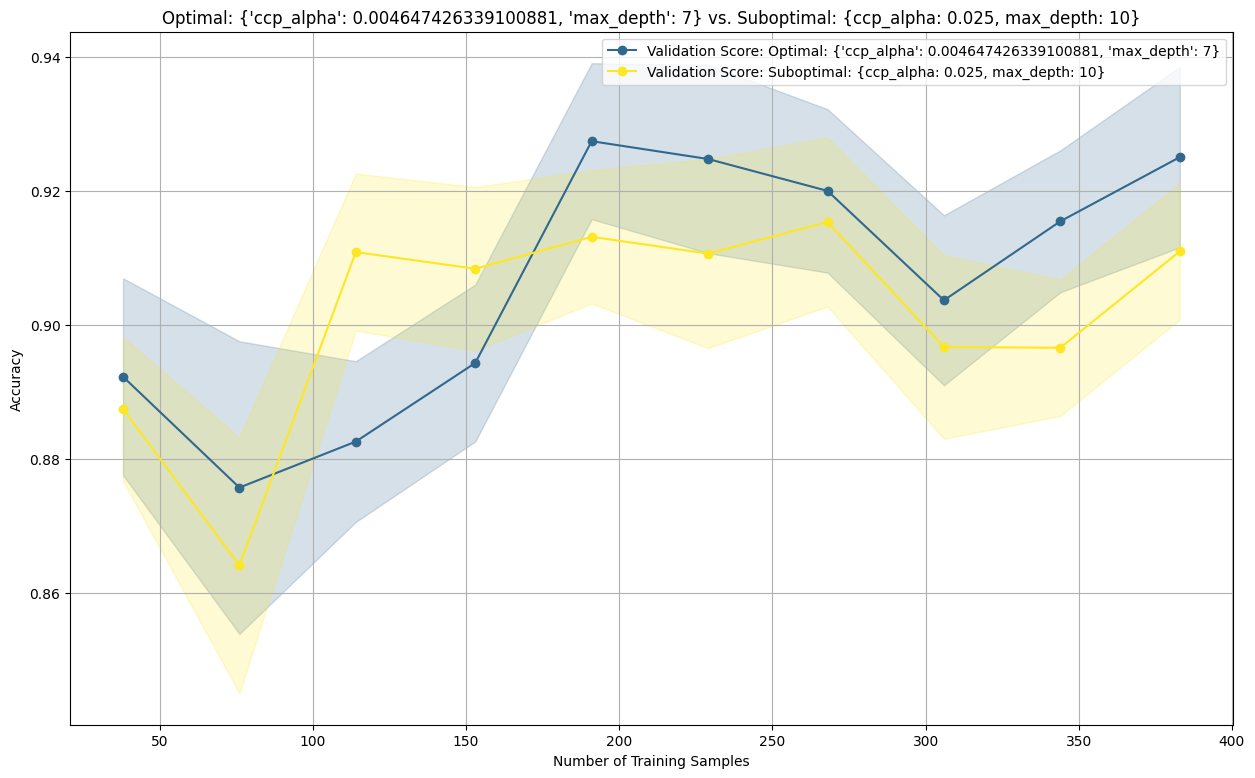

In [ ]:
plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs = [DecisionTreeClassifier(**best_params),
                             DecisionTreeClassifier(ccp_alpha = 0.025, max_depth =10)],
                             names = [f"Optimal: {best_params}", "Suboptimal: {ccp_alpha: 0.025, max_depth: 10}"],
                     plot_train = False,
                     cv = 10)

## Neural Networks (NN)


- Validation curves for at least two hyperparameters
 - Hidden Layer Size is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - Bias and variance / overfit and underfit analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - X axis should be iterations or epoch - ie loss curve
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - Bias and variance / overfit and underfit analysis
 - Add intermidate learning or validation curve to show suboptimal performance and analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times
- Analyze results isolated to other algoritms
- Compare and contrast results across algorithms and across datasets

### Hyperparameter tuning


In a neural network classifier, there are several hyperparameters that can significantly impact the performance and behavior of the model. However, two of the most important hyperparameters are typically:

- Number of Hidden Layers and Neurons: The architecture of the neural network, including the number of hidden layers and the number of neurons in each layer, is crucial. A deeper network with more layers can capture complex relationships in the data, but it also increases the risk of overfitting, especially with limited data. Conversely, a shallow network may not have enough capacity to learn intricate patterns in the data. The number of neurons in each layer also affects the model's capacity to learn and its computational complexity.

- Learning Rate: The learning rate determines the step size at which the model parameters are updated during training. It controls the rate of convergence during training and influences how quickly or slowly the model learns. A high learning rate may cause the model to overshoot the optimal solution, leading to instability or divergence, while a low learning rate may result in slow convergence or getting stuck in local minima. Finding an appropriate learning rate is crucial for training neural networks effectively.

While these two hyperparameters are often considered among the most important, other factors such as activation functions, regularization techniques, batch size, and optimization algorithms also play significant roles in determining the performance of a neural network classifier. Experimentation and tuning across these parameters are typically necessary to achieve the best performance for a specific task.


#### Hidden layer size

See the effect of hidden layers on performance of model

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

nn_layers_clfs = []
# Keep number of neurons fixed (100) and change the number of hidden layers from 2 -> 12
for i in range(2, 13):
  # ADD TIME
  clf = MLPClassifier(hidden_layer_sizes=[100 for _ in range(i)])
  clf.fit(X_train, y_train)
  nn_layers_clfs.append(clf)
  print()

#### Activation function

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

nn_activation_clfs = []
# Keep number of neurons fixed (100) and change the number of hidden layers from 2 -> 12
for i in ['identity', 'logistic', 'tanh', 'relu']:
  # ADD TIME
  clf = MLPClassifier(activation=i)
  clf.fit(X_train, y_train)
  nn_activation_clfs.append(clf)
  print()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
train_scores_activation = [clf.score(X_train, y_train) for clf in nn_activation_clfs]
test_scores_activation = [clf.score(X_test, y_test) for clf in nn_activation_clfs]

In [ ]:
train_scores_layers = [clf.score(X_train, y_train) for clf in nn_layers_clfs]
test_scores_layers = [clf.score(X_test, y_test) for clf in nn_layers_clfs]

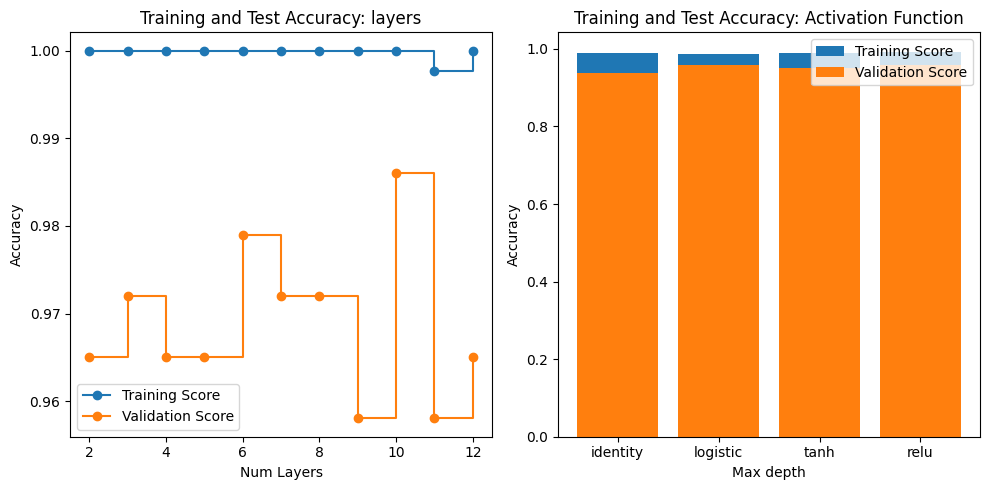

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(list(range(2, 13)), train_scores_layers, marker="o", drawstyle="steps-post", label='Training Score')
axs[0].plot(list(range(2, 13)), test_scores_layers, marker="o", drawstyle="steps-post", label='Validation Score')
axs[0].legend(loc='best')
axs[0].set_title("Training and Test Accuracy: layers")
axs[0].set_xlabel('Num Layers')
axs[0].set_ylabel('Accuracy')

axs[1].bar(['identity', 'logistic', 'tanh', 'relu'], train_scores_activation, label='Training Score')
axs[1].bar(['identity', 'logistic', 'tanh', 'relu'], test_scores_activation,  label='Validation Score')
axs[1].legend(loc='best')
axs[1].set_title("Training and Test Accuracy: Activation Function")
axs[1].set_xlabel('Max depth')
axs[1].set_ylabel('Accuracy')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the classifier
nn = MLPClassifier()

layers = [[100 for _ in range(i)] for i in range(2, 13)]
activations = ['identity', 'logistic', 'tanh', 'relu']
# Define the hyperparameters grid
param_grid = {
    'hidden_layer_sizes': layers,
    'activation': activations
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the classifier with the best parameters
best_nn = MLPClassifier(**best_params)
best_nn.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_nn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters:", best_params)
print("Test accuracy:", accuracy)


In [ ]:
suboptimal_params = {'hidden_layer_sizes': [100, 100],
                     'activation': 'tanh'}
plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs = [MLPClassifier(**best_params),
                             MLPClassifier(**suboptimal_params)],
                             names = [f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}"],
                     plot_train = False,
                     cv = 10)

In [ ]:
suboptimal_params = {'hidden_layer_sizes': [100, 100],
                     'activation': 'tanh'}
plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs = [MLPClassifier(**suboptimal_params)],
                     cv = 10)

## KNN Classifier

- Validation curves for at least two hyperparameters
 - K is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - Bias and variance / overfit and underfit analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - Bias and variance / overfit and underfit analysis
 - Add intermidate learning or validation curve to show suboptimal performance and analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times
- Analyze results isolated to other algoritms
- Compare and contrast results across algorithms and across datasets

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Hyperparameter tuning


In a k-Nearest Neighbors (kNN) classifier, the two most important parameters are:

- Number of Neighbors (k): The choice of the number of neighbors, represented by the parameter 'k', is critical in kNN. It determines how many nearest neighbors to consider when making predictions for a new data point. Selecting an appropriate value for 'k' is essential because a small 'k' value may result in a noisy decision boundary, leading to overfitting, while a large 'k' value may cause the model to be overly biased and ignore local patterns in the data.

- Distance Metric: The choice of distance metric is also crucial in kNN, as it determines how the distance between data points is measured. The most commonly used distance metrics are Euclidean distance and Manhattan distance, but other options like Minkowski distance and cosine similarity may also be suitable depending on the nature of the data. Selecting the appropriate distance metric is essential for accurately capturing the similarity between data points and ensuring the effectiveness of the kNN algorithm.

These two parameters, the number of neighbors ('k') and the distance metric, significantly impact the performance of a kNN classifier. It's important to experiment with different values for these parameters and potentially perform hyperparameter tuning to find the optimal combination for a given dataset and classification task.


#### Number of Neighbors (k)

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

knn_k_clfs = []
# Keep number of neurons fixed (100) and change the number of hidden layers from 2 -> 12
for k in range(5, 50, 5):
  # ADD TIME
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, y_train)
  knn_k_clfs.append(clf)
  print()

#### Distance Metric

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

knn_metric_clfs = []
# Keep number of neurons fixed (100) and change the number of hidden layers from 2 -> 12
metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']
for metric in metrics:
  # ADD TIME
  clf = KNeighborsClassifier(metric=metric)
  clf.fit(X_train, y_train)
  knn_metric_clfs.append(clf)
  print()



In [ ]:
train_scores_k = [clf.score(X_train, y_train) for clf in knn_k_clfs]
test_scores_k = [clf.score(X_test, y_test) for clf in knn_k_clfs]

train_scores_metric = [clf.score(X_train, y_train) for clf in knn_metric_clfs]
test_scores_metric = [clf.score(X_test, y_test) for clf in knn_metric_clfs]

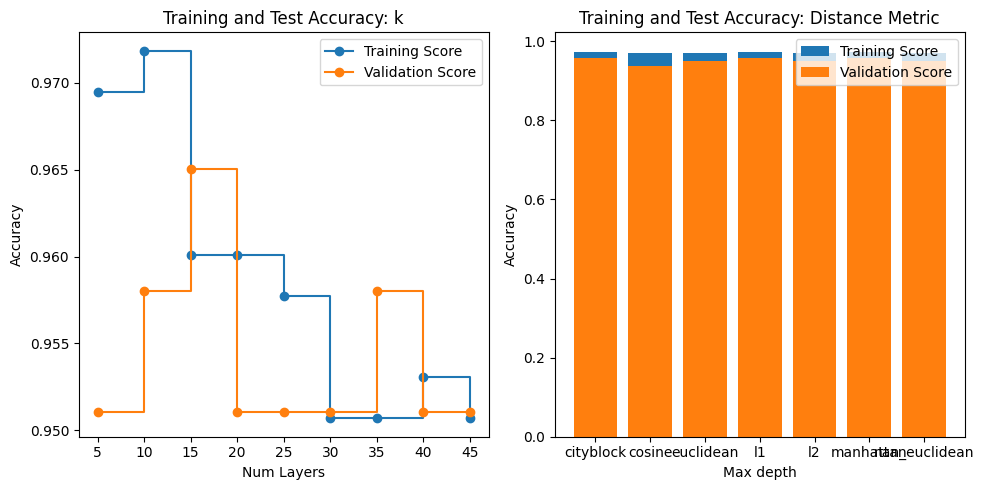

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot( range(5, 50, 5), train_scores_k, marker="o", drawstyle="steps-post", label='Training Score')
axs[0].plot( range(5, 50, 5), test_scores_k, marker="o", drawstyle="steps-post", label='Validation Score')
axs[0].legend(loc='best')
axs[0].set_title("Training and Test Accuracy: k")
axs[0].set_xlabel('Num Layers')
axs[0].set_ylabel('Accuracy')

axs[1].bar(metrics, train_scores_metric, label='Training Score')
axs[1].bar(metrics, test_scores_metric,  label='Validation Score')
axs[1].legend(loc='best')
axs[1].set_title("Training and Test Accuracy: Distance Metric")
axs[1].set_xlabel('Max depth')
axs[1].set_ylabel('Accuracy')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the classifier
knn = KNeighborsClassifier()

k = list(range(5, 50, 5))
metrics = metrics
# Define the hyperparameters grid
param_grid = {
    'n_neighbors': k,
    'metric': metrics
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the classifier with the best parameters
best_nn = KNeighborsClassifier(**best_params)
best_nn.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_nn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters:", best_params)
print("Test accuracy:", accuracy)

Best parameters: {'metric': 'cosine', 'n_neighbors': 20}
Test accuracy: 0.9370629370629371


["Optimal: {'metric': 'cosine', 'n_neighbors': 20}", "Suboptimal: {'n_neighbors': 5, 'metric': 'l1'}"]
KNeighborsClassifier time: 2.9478 seconds
KNeighborsClassifier time: 2.5151 seconds


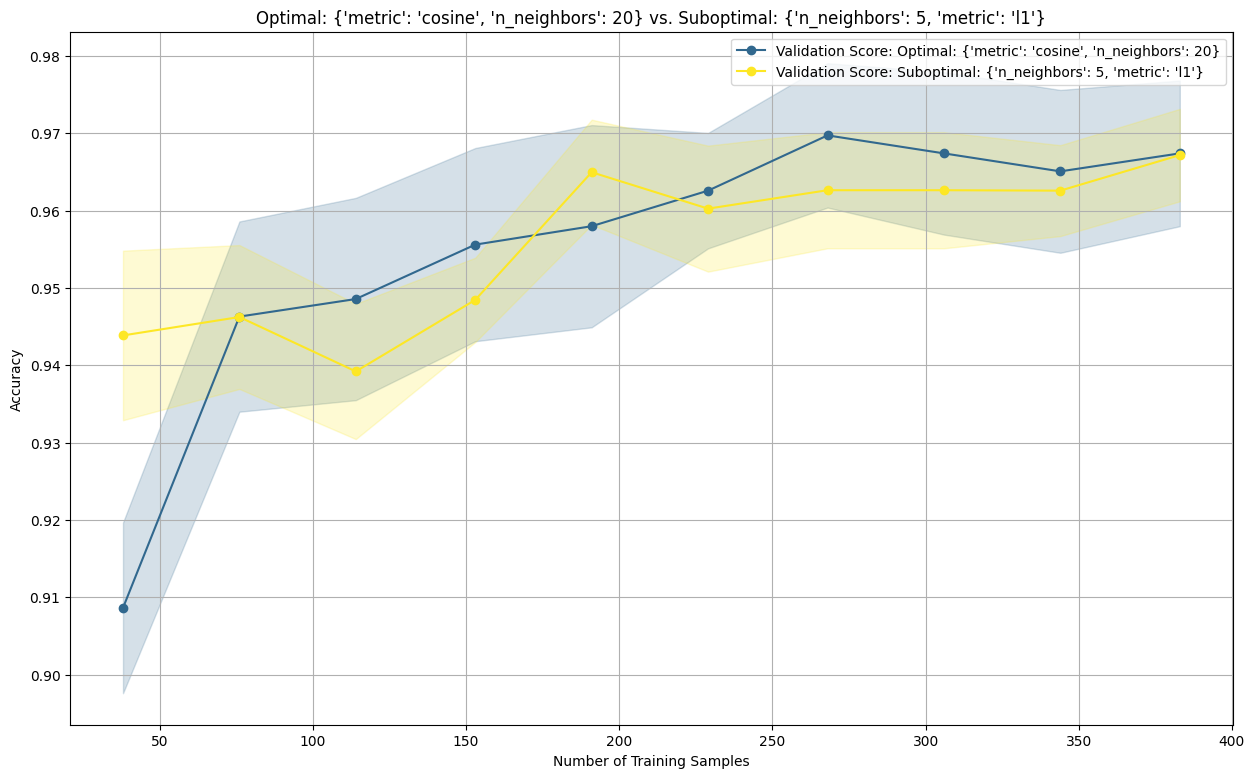

In [ ]:
suboptimal_params = {'n_neighbors': 5,
                    'metric': "l1"}
plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs = [KNeighborsClassifier(**best_params),
                             KNeighborsClassifier(**suboptimal_params)],
                             names = [f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}"],
                     plot_train = False,
                     cv = 10)

### Support Vector Machines

- Validation curves for at least two hyperparameters
 - Kernel Type is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - Bias and variance / overfit and underfit analysis
 - Add intermidate learning or validation curve to show suboptimal performance and analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - Bias and variance / overfit and underfit analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times
- Analyze results isolated to other algoritms
- Compare and contrast results across algorithms and across datasets

In [13]:
from sklearn.svm import SVC

### Hyperparameter Tuning


In support vector classifiers (SVC), two of the most important hyperparameters are:

- C: This hyperparameter controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C leads to a larger margin but may misclassify some training points, while a larger value of C allows for fewer misclassifications but may result in a smaller margin. Tuning C is crucial for controlling the balance between bias and variance in the model.

- Kernel choice and its parameters: SVC can use different types of kernels (e.g., linear, polynomial, radial basis function (RBF), sigmoid) to transform the input space into a higher-dimensional feature space where the data might be more separable. The choice of kernel and its associated parameters (e.g., degree for polynomial kernel, gamma for RBF kernel) significantly affect the model's performance. For example, the RBF kernel's gamma parameter controls the influence of individual training samples, while the polynomial kernel's degree parameter determines the degree of the polynomial used in the transformation.

Optimizing these hyperparameters through techniques like grid search or randomized search is essential to achieve the best performance of an SVC model for a given dataset.

#### C

In [25]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

svc_c_clfs = []
C_values = [item for sublist in  [[0.01 * 10 ** i, 0.05 * 10 ** i ] for i in range(6)] for item in sublist]
print(C_values)
# Keep number of neurons fixed (100) and change the number of hidden layers from 2 -> 12
for C in C_values:
  # ADD TIME
  clf = SVC(C=C)
  clf.fit(X_train, y_train)
  svc_c_clfs.append(clf)
  print()

[0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0]














### Kernel choice


In [40]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

svc_kernel_clfs = []
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
# Keep number of neurons fixed (100) and change the number of hidden layers from 2 -> 12
for kernel_type in kernels:
  # ADD TIME
  if kernel_type == 'custom':
      # Simple custom kernel function
      def custom_kernel(x, y):
          return np.dot(x, y.T)
      clf = SVC(kernel=custom_kernel)
  else:
      clf = SVC(kernel=kernel_type)
  clf.fit(X_train, y_train)
  svc_kernel_clfs.append(clf)
  print()

In [41]:
train_scores_c = [clf.score(X_train, y_train) for clf in svc_c_clfs]
test_scores_c = [clf.score(X_test, y_test) for clf in svc_c_clfs]

train_scores_kernels = [clf.score(X_train, y_train) for clf in svc_kernel_clfs]
test_scores_kernels = [clf.score(X_test, y_test) for clf in svc_kernel_clfs]

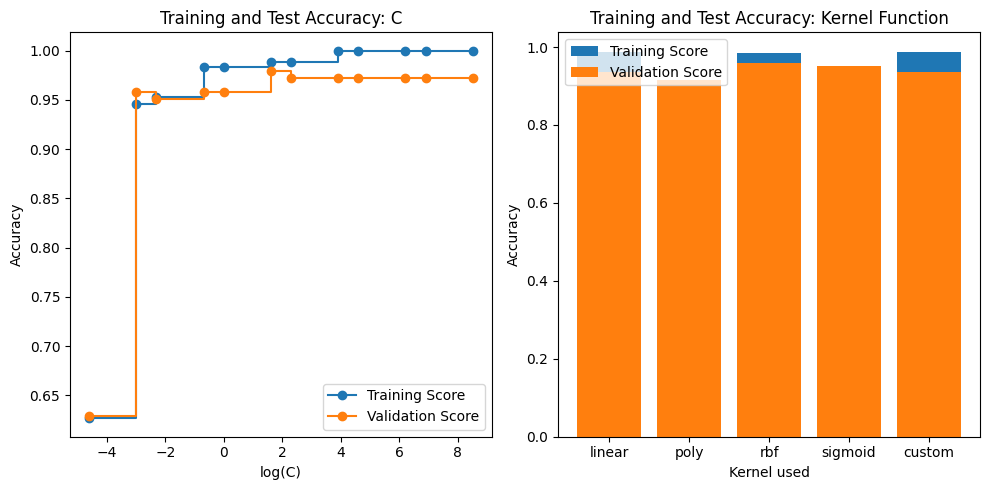

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(np.log(C_values), train_scores_c, marker="o", drawstyle="steps-post", label='Training Score')
axs[0].plot(np.log(C_values), test_scores_c, marker="o", drawstyle="steps-post", label='Validation Score')
axs[0].legend(loc='best')
axs[0].set_title("Training and Test Accuracy: C")
axs[0].set_xlabel('log(C)')
axs[0].set_ylabel('Accuracy')

axs[1].bar(kernels, train_scores_kernels, label='Training Score')
axs[1].bar(kernels, test_scores_kernels,  label='Validation Score')
axs[1].legend(loc='best')
axs[1].set_title("Training and Test Accuracy: Kernel Function")
axs[1].set_xlabel('Kernel used')
axs[1].set_ylabel('Accuracy')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

def perform_cross_validation(X, y, kernel_type='linear', num_folds=5):
    """
    Perform cross-validation for Support Vector Classification (SVC) with different kernels.

    Parameters:
    - X: Input features.
    - y: Target variable.
    - kernel_type: Type of kernel to be used ('linear', 'poly', 'rbf', 'sigmoid', or 'custom').
    - num_folds: Number of folds for cross-validation.

    Returns:
    - Mean accuracy across folds.
    """

    if kernel_type == 'custom':
        # If using a custom kernel, define your custom kernel function here
        def custom_kernel(x, y):
            # Your custom kernel function
            return np.dot(x, y.T)

        clf = SVC(kernel=custom_kernel)
    else:
        clf = SVC(kernel=kernel_type)

    # Perform cross-validation and get accuracy scores for each fold
    scores = cross_val_score(clf, X, y, cv=num_folds)

    # Return the mean accuracy across folds
    return np.mean(scores)

# Example usage:
# Assuming you have your features (X) and target variable (y) ready

# Example with Linear Kernel
linear_accuracy = perform_cross_validation(X, y, kernel_type='linear')
print(f'Linear Kernel Accuracy: {linear_accuracy:.4f}')

# Example with Polynomial Kernel
poly_accuracy = perform_cross_validation(X, y, kernel_type='poly')
print(f'Polynomial Kernel Accuracy: {poly_accuracy:.4f}')

# Example with RBF Kernel
rbf_accuracy = perform_cross_validation(X, y, kernel_type='rbf')
print(f'RBF Kernel Accuracy: {rbf_accuracy:.4f}')

# Example with Sigmoid Kernel
sigmoid_accuracy = perform_cross_validation(X, y, kernel_type='sigmoid')
print(f'Sigmoid Kernel Accuracy: {sigmoid_accuracy:.4f}')

# Example with Custom Kernel
custom_accuracy = perform_cross_validation(X, y, kernel_type='custom')
print(f'Custom Kernel Accuracy: {custom_accuracy:.4f}')


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the classifier
svc = SVC()

C_values = [item for sublist in  [[0.01 * 10 ** i, 0.05 * 10 ** i ] for i in range(6)] for item in sublist]
kernels = ['linear', 'poly', 'sigmoid', 'rbf']

# Define the hyperparameters grid
param_grid = {
    'C': C_values,
    'kernel': kernels
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the classifier with the best parameters
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters:", best_params)
print("Test accuracy:", accuracy)

Best parameters: {'C': 0.5, 'kernel': 'linear'}
Test accuracy: 0.951048951048951


["Optimal: {'C': 0.5, 'kernel': 'linear'}", "Suboptimal: {'C': 0.05, 'kernel': 'rbf'}"]
SVC time: 1.0688 seconds
SVC time: 1.8889 seconds


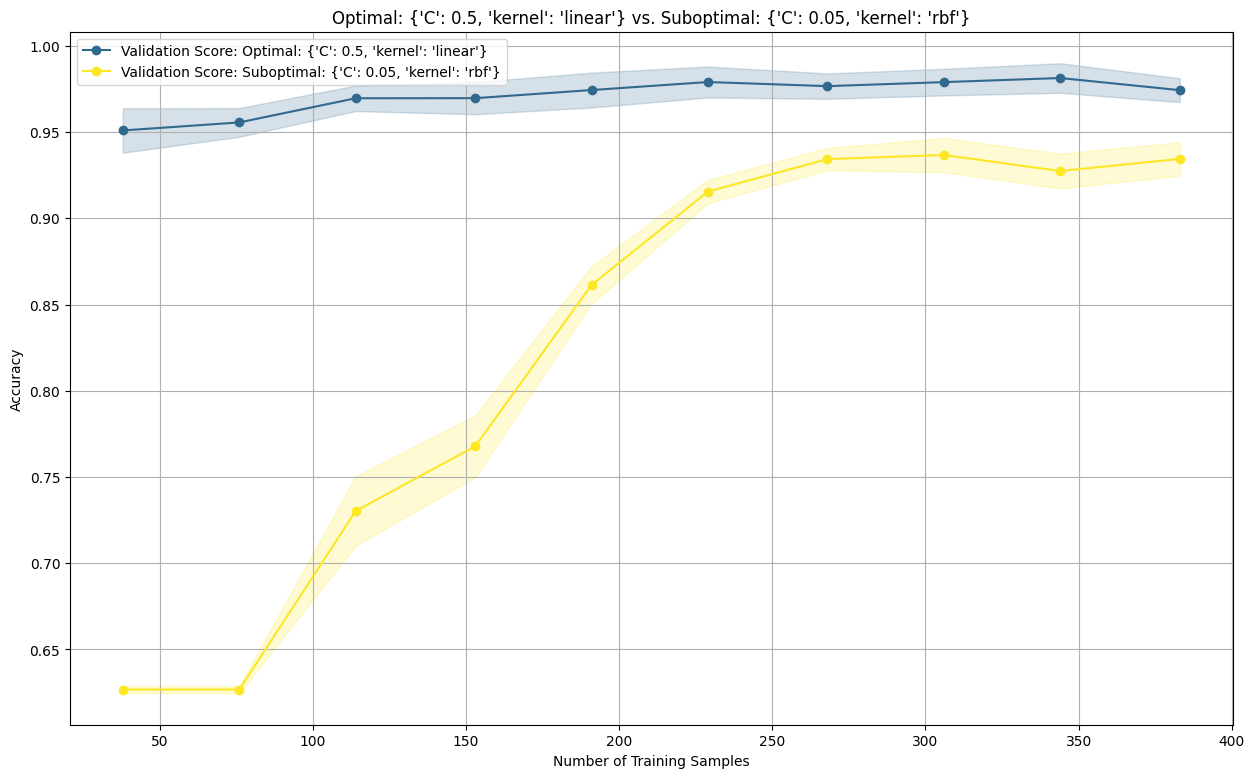

In [44]:
suboptimal_params = {'C': 0.05,
                    'kernel': "rbf"}
plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs = [SVC(**best_params),
                             SVC(**suboptimal_params)],
                             names = [f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}"],
                     plot_train = False,
                     cv = 10)

## Boosting

- Validation curves for at least two hyperparameters
 - \# of Weak Learners is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - Bias and variance / overfit and underfit analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - Bias and variance / overfit and underfit analysis
- Add intermidate learning or validation curve to show suboptimal performance and analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times
- Analyze results isolated to other algoritms
- Compare and contrast results across algorithms and across datasets

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

### Hyperparamter tuning


In gradient boosting, there are several hyperparameters that play crucial roles in the performance and behavior of the model. Some of the most important hyperparameters include:

- n_estimators: This parameter defines the number of boosting stages (weak learners, typically decision trees) to be used in the ensemble. Increasing the number of estimators generally improves the model's performance, but it also increases computational complexity and the risk of overfitting.

- learning_rate: Also known as the shrinkage parameter (or eta), the learning rate controls the contribution of each tree to the final ensemble. Lower values require more boosting iterations but can improve generalization and robustness to overfitting.

- max_depth: This parameter determines the maximum depth of each individual decision tree in the ensemble. Deeper trees can capture more complex relationships in the data but may also lead to overfitting. Limiting the max_depth can help control the complexity of the model and improve generalization.

These are some of the key hyperparameters in gradient boosting, but there may be additional parameters depending on the specific implementation or variant of the algorithm. Tuning these hyperparameters through techniques like grid search or randomized search is essential for optimizing the model's performance on a given dataset.

In [54]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
def hyperparameter_tuning(model, param, values):
  clfs = []

  # Looping through values of params
  for n in values:
    params = {
        param: n
        }
    # ADD TIME
    clf = model(**params)
    clf.fit(X_train, y_train)
    clfs.append(clf)
  return clfs

In [59]:
# Hyperparameter variation
# Number of weak learners
n_estimators = [item for sublist in  [[1 * 10 ** i, 5 * 10 ** i] for i in range(4)] for item in sublist]
gbc_n_clfs = hyperparameter_tuning(GradientBoostingClassifier, "n_estimators", n_estimators)

# Learning rate
lr_values = [item for sublist in  [[0.005 * 10 ** i, 0.01 * 10 ** i] for i in range(3)] for item in sublist]
gbc_lr_clfs = hyperparameter_tuning(GradientBoostingClassifier, "learning_rate", lr_values)

# Max depth of the estimators
max_depth = list(range(1, 13))
gbc_d_clfs = hyperparameter_tuning(GradientBoostingClassifier, "max_depth", max_depth)

Get scores for plotting and uderstanding bias variance tradeoff

In [60]:
train_scores_n = [clf.score(X_train, y_train) for clf in gbc_n_clfs]
test_scores_n = [clf.score(X_test, y_test) for clf in gbc_n_clfs]

train_scores_lr = [clf.score(X_train, y_train) for clf in gbc_lr_clfs]
test_scores_lr = [clf.score(X_test, y_test) for clf in gbc_lr_clfs]

train_scores_d = [clf.score(X_train, y_train) for clf in gbc_d_clfs]
test_scores_d = [clf.score(X_test, y_test) for clf in gbc_d_clfs]

Plotting training and testing accuracy variation with hyperparameters

In [71]:
train_scores = [train_scores_n, train_scores_lr, train_scores_d]
test_scores = [test_scores_n, test_scores_lr, test_scores_d]
params = [n_estimators, lr_values, max_depth]
param_names = ["n_estimators", "learning_rate", "max_depth"]

In [67]:
def plot_train_test_metrics(train_scores, test_scores, params, param_names):
  num_params = len(params_name)
  fig, axs = plt.subplots(1, len(train_scores), figsize=(num_params * 5, 5))
  contains_strings = any(isinstance(element, str) for element in params)
  for i in range(num_params):
    if not contains_strings:
      axs[i].plot(params[i], train_scores[i], marker="o", drawstyle="steps-post", label='Training Score')
      axs[i].plot(params[i], test_scores[i], marker="o", drawstyle="steps-post", label='Validation Score')
      axs[i].legend(loc='best')
      axs[i].set_title(f"Training and Test Accuracy: {params_name[i]}")
      axs[i].set_xlabel(params_name[i])
      axs[i].set_ylabel('Accuracy')
    else:
      axs[1].bar(params[i], train_scores[i], label='Training Score')
      axs[1].bar(params[i], test_scores[i],  label='Validation Score')
      axs[1].legend(loc='best')
      axs[1].set_title(f"Training and Test Accuracy: {params_name[i]}")
      axs[1].set_xlabel({params_name[i]})
      axs[1].set_ylabel('Accuracy')

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Show plot
  plt.show()

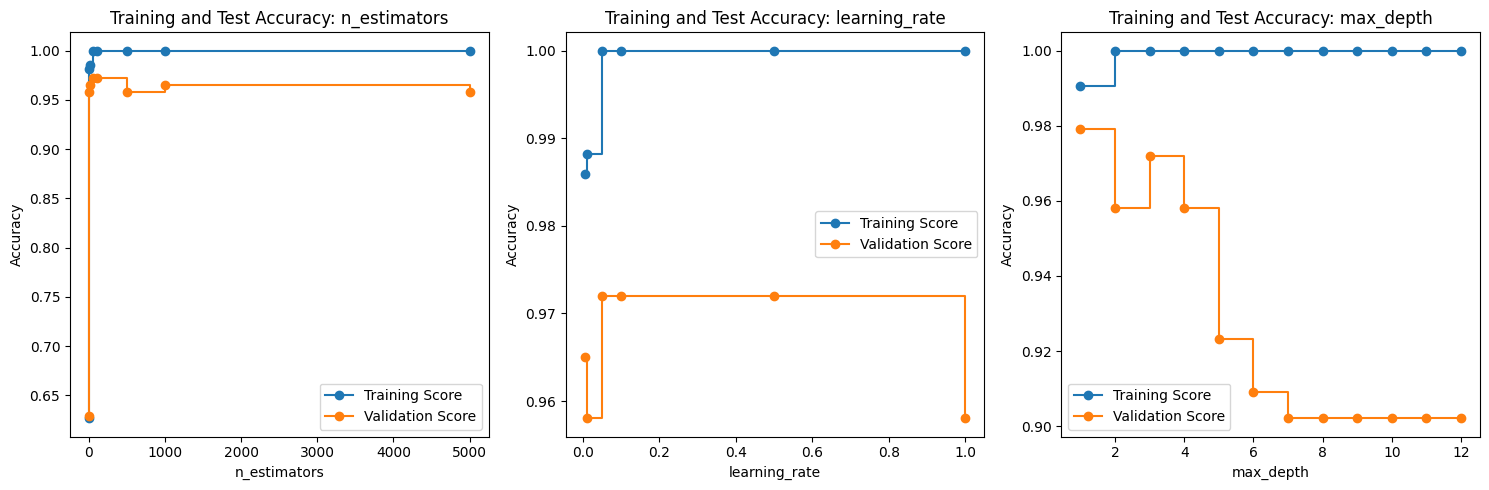

In [68]:
plot_train_test_metrics(train_scores, test_scores, params, params_name)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_score(y_true, y_pred, score_name):
    """
    Calculate and return different scores based on the passed string name of the score.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    score_name (str): Name of the score ('accuracy', 'precision', 'recall', 'f1').

    Returns:
    float: Calculated score.
    """
    if score_name == 'accuracy':
        return accuracy_score(y_true, y_pred)
    elif score_name == 'precision':
        return precision_score(y_true, y_pred)
    elif score_name == 'recall':
        return recall_score(y_true, y_pred)
    elif score_name == 'f1':
        return f1_score(y_true, y_pred)
    else:
        raise ValueError("Invalid score name. Please choose from 'accuracy', 'precision', 'recall', or 'f1'.")


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def grid_search_func(estimator, params, param_names,
                     cv=5, scoring='accuracy',
                     X_train = X_train, X_test = X_test,
                     y_train = y_train, y_test = y_test):

  # Define the hyperparameters grid
  param_grid = {param_name: param for param_name, param in zip(param_names, params)}

  # Perform grid search with cross-validation
  grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring)
  grid_search.fit(X_train, y_train)

  # Get the best parameters
  best_params = grid_search.best_params_

  # Train the classifier with the best parameters
  clf = estimator(**best_params)
  clf.fit(X_train, y_train)

  # Predictions on the test set
  y_pred = clf.predict(X_test)

  # Calculate score
  score = get_score(scoring)

  print("Best parameters:", best_params)
  print("Test accuracy:", score)

In [73]:
grid_search_func(GradientBoostingClassifier(), params, param_names,
                     cv=5, scoring='accuracy',
                     X_train = X_train, X_test = X_test,
                     y_train = y_train, y_test = y_test)

KeyboardInterrupt: 

In [99]:
def grid_search_func(estimator, params, param_names,
                     cv=5, scoring='accuracy',
                     X_train=None, X_test=None,
                     y_train=None, y_test=None,
                     verbose=0):
    """
    Perform grid search with cross-validation to find the best hyperparameters for the given estimator.

    Parameters:
    estimator (object): The estimator object to be tuned.
    params (list of dicts): List of dictionaries containing the hyperparameters to tune.
    param_names (list of str): List of hyperparameter names.
    cv (int, cross-validation generator, iterable, default=5): Determines the cross-validation splitting strategy.
    scoring (str or callable, default='accuracy'): Scoring metric to use for evaluation.
    X_train (array-like, optional): Training data.
    X_test (array-like, optional): Testing data.
    y_train (array-like, optional): Training labels.
    y_test (array-like, optional): Testing labels.


    Returns:
    dict: Best parameters found during grid search.
    """
    # Define the hyperparameters grid
    param_grid = {param_name: param for param_name, param in zip(param_names, params)}

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=verbose)
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Train the classifier with the best parameters
    clf = estimator.set_params(**best_params)
    clf.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate score
    score = accuracy_score(y_test, y_pred)

    print("Best parameters:", best_params)
    print("Test accuracy:", score)
    return (best_params)

In [75]:
import matplotlib.pyplot as plt

def plot_train_test_metrics(train_scores, test_scores, params, param_names, scoring = 'Accuracy'):
    """
    Plot training and test metrics (e.g., accuracy) across different hyperparameter values.

    Parameters:
    train_scores (list of arrays): Training scores for each hyperparameter configuration.
    test_scores (list of arrays): Test scores for each hyperparameter configuration.
    params (list of arrays): Hyperparameter values.
    param_names (list of str): Names of hyperparameters.
    scoring (str): Scoring metric used

    Returns:
    None
    """
    num_params = len(param_names)
    fig, axs = plt.subplots(1, num_params, figsize=(num_params * 5, 5))
    contains_strings = any(isinstance(element, str) for element in params)

    for i in range(num_params):
        if not contains_strings:
            axs[i].plot(params[i], train_scores[i], marker="o", drawstyle="steps-post", label='Training Score')
            axs[i].plot(params[i], test_scores[i], marker="o", drawstyle="steps-post", label='Validation Score')
            axs[i].legend(loc='best')
            axs[i].set_title(f"Training and Test {scoring}: {param_names[i]}")
            axs[i].set_xlabel(param_names[i])
            axs[i].set_ylabel(scoring)
        else:
            axs[i].bar(params[i], train_scores[i], label='Training Score')
            axs[i].bar(params[i], test_scores[i],  label='Validation Score')
            axs[i].legend(loc='best')
            axs[i].set_title(f"Training and Test {scoring}: {param_names[i]}")
            axs[i].set_xlabel(param_names[i])
            axs[i].set_ylabel(scoring)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show plot
    plt.show()

In [76]:
from sklearn.metrics import accuracy_score

def train_clfs_with_hyperparameters(model, param_name, param_values, X_train, y_train):
    """
    Train classifiers with different values of a hyperparameter.

    Parameters:
    model (class): The classifier model to be tuned.
    param_name (str): Name of the hyperparameter.
    param_values (list): List of values for the hyperparameter.
    X_train (array-like): Training data.
    y_train (array-like): Training labels.

    Returns:
    list: List of trained classifiers with different hyperparameter values.
    """
    clfs = []

    # Loop through values of the hyperparameter
    for value in param_values:
        params = {param_name: value}
        clf = model(**params)
        clf.fit(X_train, y_train)
        clfs.append(clf)

    return clfs

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import time

def plot_learning_curves(X_train, X_test, y_train, y_test, clfs, plot_train=True, cv=5, names=None):
    """
    Plot learning curves for multiple classifiers.

    Parameters:
    X_train (array-like): Training data.
    X_test (array-like): Testing data.
    y_train (array-like): Training labels.
    y_test (array-like): Testing labels.
    clfs (list of classifiers): List of classifier instances.
    plot_train (bool, default=True): Whether to plot training scores.
    cv (int, cross-validation generator, iterable, optional, default=5): Determines the cross-validation splitting strategy.
    names (list of str, optional): List of names for each classifier.

    Returns:
    None
    """
    i = 0
    j = 0
    num_colors = len(clfs) * 2
    cmap = plt.get_cmap('viridis', num_colors)
    rgb_values = [cmap(i)[:3] for i in np.linspace(0, 1, num_colors)]

    plt.figure(figsize=(15, 9))
    for clf in clfs:
        start_time = time.time()
        if len(set(y_train)) > 2:
            train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=cv,
                                                                    scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10))
            train_scores = -train_scores
            val_scores = -val_scores
        else:
            train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10))

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_sem = np.std(train_scores, axis=1) / np.sqrt(len(train_scores))
        val_scores_mean = np.mean(val_scores, axis=1)
        val_scores_sem = np.std(val_scores, axis=1) / np.sqrt(len(val_scores))

        if names is None:
            clf_name = set([clf.__class__.__name__ for clf in clfs])
            title = " vs. ".join([name for name in clf_name])
            label_train = f'Training Score {clf.__class__.__name__}'
            label_val = f'Validation Score {clf.__class__.__name__}'
        else:
            title = " vs. ".join([name for name in names])
            label_train = f'Training Score: {names[j]}'
            label_val = f'Validation Score: {names[j]}'
            j += 1

        if plot_train:
            plt.plot(train_sizes, train_scores_mean, label=label_train, color=rgb_values[i], marker='o')
            plt.fill_between(train_sizes, train_scores_mean - train_scores_sem, train_scores_mean + train_scores_sem, alpha=0.2, color=rgb_values[i])

        plt.plot(train_sizes, val_scores_mean, label=label_val, color=rgb_values[i + 1], marker='o')
        plt.fill_between(train_sizes, val_scores_mean - val_scores_sem, val_scores_mean + val_scores_sem, alpha=0.2, color=rgb_values[i + 1])
        i += 2

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"{clf.__class__.__name__} time: {elapsed_time:.4f} seconds")

    plt.title(title)
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy' if len(set(y_train)) == 2 else 'Negative Log Loss')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


In [95]:
# Hyperparameter variation
# Number of weak learners
n_estimators = [item for sublist in  [[1 * 10 ** i, 5 * 10 ** i] for i in range(4)] for item in sublist]
# Learning rate
lr_values = [item for sublist in  [[0.005 * 10 ** i, 0.01 * 10 ** i] for i in range(3)] for item in sublist]
# Max depth of the estimators
max_depth = list(range(1, 12))

In [96]:
params = [n_estimators, lr_values, max_depth]
param_names = ["n_estimators", "learning_rate", "max_depth"]

In [ ]:
grid_search_func(GradientBoostingClassifier(), params, param_names,
                     cv=5, scoring='accuracy',
                     X_train = X_train, X_test = X_test,
                     y_train = y_train, y_test = y_test)

In a medical classification problem like predicting whether a tumor will turn malignant, the choice of evaluation metric is critical as it directly impacts patient outcomes. Given the context, the most appropriate metric to use would be a combination of Sensitivity (Recall) and Specificity.

- Sensitivity (Recall): Sensitivity measures the proportion of true positive predictions among all actual positive instances, i.e., it tells us how well the classifier identifies malignant tumors out of all the tumors that are actually malignant. In this context, high sensitivity is crucial because missing a malignant tumor (false negative) could have severe consequences for the patient's health.

- Specificity: Specificity measures the proportion of true negative predictions among all actual negative instances, i.e., it tells us how well the classifier identifies benign tumors out of all the tumors that are actually benign. In this context, high specificity is also important because misclassifying a benign tumor as malignant (false positive) could lead to unnecessary stress, treatments, or surgeries for the patient.

Given the importance of both minimizing false negatives (missing malignant tumors) and false positives (misclassifying benign tumors), it's common to use metrics that balance sensitivity and specificity, such as the F1 Score. This metric considers both false positives and false negatives and provides a more comprehensive evaluation of the classifier's performance and ensures a balanced evaluation of the classifier's performance.

In [ ]:
import numpy as np

def is_exponential(arr):
    # Calculate differences between consecutive elements
    diffs = np.diff(arr)

    # Calculate the ratio between consecutive elements
    ratios = arr[1:] / arr[:-1]

    # Check if ratios are approximately constant (within a tolerance)
    tolerance = 0.01  # Adjust as needed
    is_constant = np.all(np.abs(ratios - ratios.mean()) < tolerance)

    return is_constant

# Example usage
arr = np.array([item for sublist in  [[1 * 10 ** i, 5 * 10 ** i] for i in range(4)] for item in sublist])
print(is_exponential(arr))  # Output: True

arr2 = np.array([1, 3, 9, 27, 81])
print(is_exponential(arr2))  # Output: True

arr3 = np.array([1, 2, 3, 5, 8, 13])
print(is_exponential(arr3))  # Output: False



For your classification problem where you are trying to classify reviews as positive, negative, or neutral, the most appropriate metrics to use can vary depending on your specific objectives. Let's consider the scenarios you mentioned:

- Focusing on accurately identifying positive and negative reviews: In this case, you would prioritize correctly identifying positive and negative reviews while potentially allowing some errors in classifying neutral reviews. A suitable metric for this scenario is the F1 score or precision and recall for the positive and negative classes.
Specifically, you would be interested in the precision and recall of the positive and negative classes separately. High precision indicates that when the model predicts a review as positive/negative, it is likely to be correct. High recall indicates that the model is capturing a high proportion of positive/negative reviews out of all the actual positive/negative reviews.
Additionally, you may want to consider the ROC AUC (Receiver Operating Characteristic Area Under the Curve) metric, which provides a measure of the model's ability to distinguish between positive and negative reviews across different thresholds.

- Identifying extreme vs. mild reviews: In this scenario, you are interested in distinguishing between extreme sentiments (positive/negative) and mild sentiments (neutral). A suitable metric for this objective is accuracy or balanced accuracy.
Accuracy measures the overall correctness of the classifier, i.e., the ratio of correctly predicted instances to the total number of instances. However, for imbalanced datasets (where one class dominates the others, e.g., many neutral reviews compared to positive/negative), balanced accuracy, which considers the imbalance in class distribution, may be more appropriate.
You may also consider using metrics like Matthews Correlation Coefficient (MCC), which takes into account true positives, true negatives, false positives, and false negatives and is suitable for imbalanced datasets.
In summary:

If your priority is accurately identifying positive and negative reviews, focus on precision, recall, F1 score, and ROC AUC.
If you are interested in distinguishing extreme vs. mild sentiments, consider using accuracy, balanced accuracy, and MCC.
Choose the metrics that align with your specific objectives and consider the trade-offs between different metrics based on the importance of correctly identifying each class and the class distribution in your dataset.